## Capstone Data Visualizations

In [38]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
def get_df(csv_file):
    with open(csv_file, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        df = pd.DataFrame(reader)
    return df

raw_data = ['final_Grant.csv',
            'final_Patent.csv',
            'final_CT.csv',
            'final_Pub.csv']

grants = get_df('final_Grant.csv')
patents = get_df('final_Patent.csv')
clinical_trials = get_df('final_CT.csv')
publications = get_df('final_Pub.csv')



In [33]:
#print(publications.columns)
#print(grants["year"])
# print(grants.columns)
# print(patents.columns)
# print(clinical_trials.columns)

rows_with_empty_values = patents[patents["year"].isna()]

# Display the rows with empty values in the specified column
print(rows_with_empty_values)


Empty DataFrame
Columns: [Person, abstract, additional_filters, application_number, assignee_cities, assignee_countries, assignee_names, assignee_state_codes, assignees, category_for, category_for_2020, category_hrcs_hc, category_icrp_cso, category_icrp_ct, category_rcdc, claims_amount, date, date_inserted, dimensions_url, family_count, family_id, filing_date, filing_status, id, inventor_names, inventors, ipcr, jurisdiction, kind, legal_status, original_assignee_names, original_assignees, priority_date, priority_year, publication_date, publication_ids, publication_year, publications, reference_ids, researchers, score, times_cited, title, year, asci_year]
Index: []

[0 rows x 45 columns]


In [27]:
def create_basic(df, column, label):
    filtered_1995 = df[df['asci_year'] == "1995"][column].astype(int)
    filtered_2010 = df[df['asci_year'] == "2010"][column].astype(int)

    plt.figure(figsize=(15, 6))

    plt.hist([filtered_1995, filtered_2010], bins=range(1970, 2026, 1), color=['Black', 'Red'], label=['ASCI inductees of 1995', 'ASCI inductees of 2010'])
    plt.xlabel(label + ' Years')
    plt.ylabel('Number of '+ label)
    plt.title('Total ' + label + ' from 1970 to 2024')
    plt.legend()
    plt.grid(True)
    interval = 2
    plt.xticks(range(1970, 2025, interval),rotation=45)


    plt.show()


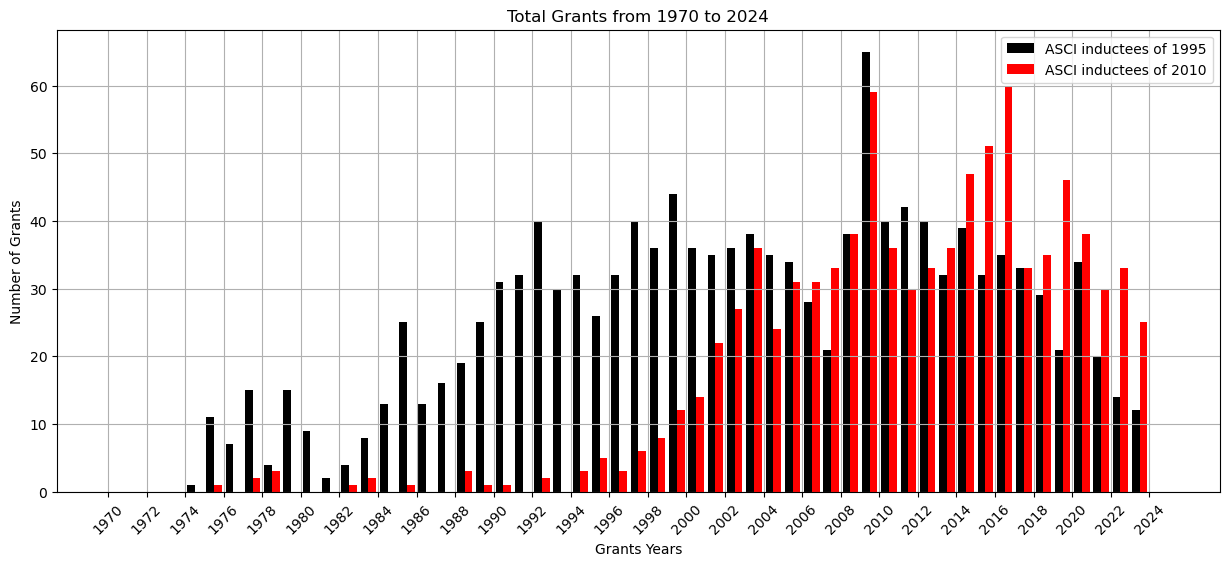

In [28]:
create_basic(grants, "year", "Grants")


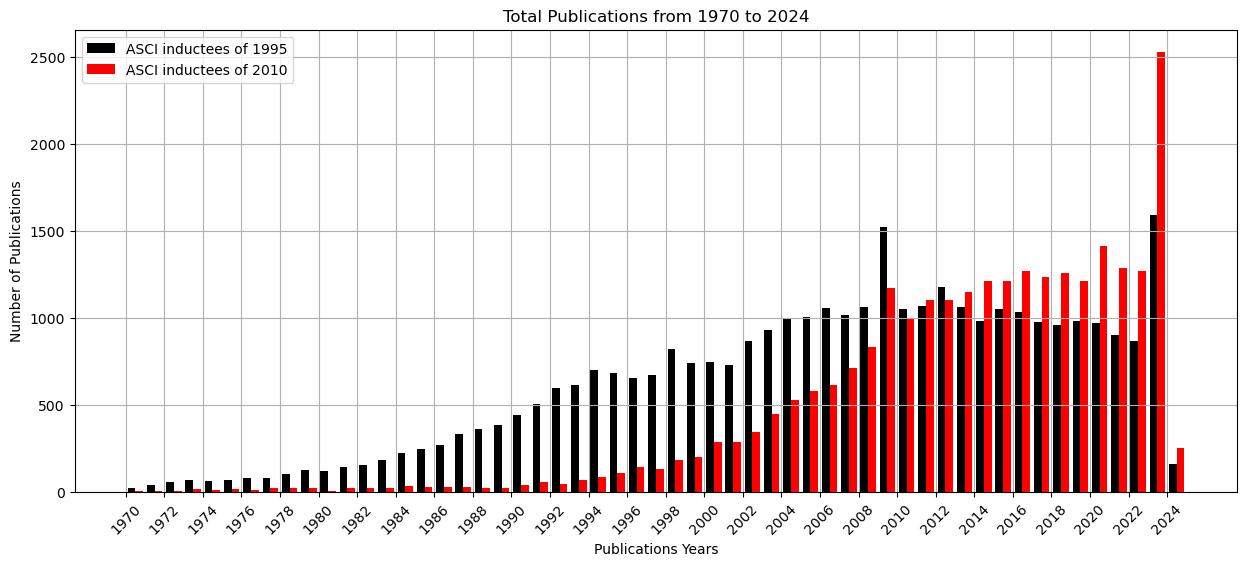

In [29]:
create_basic(publications, "publication_year", "Publications")


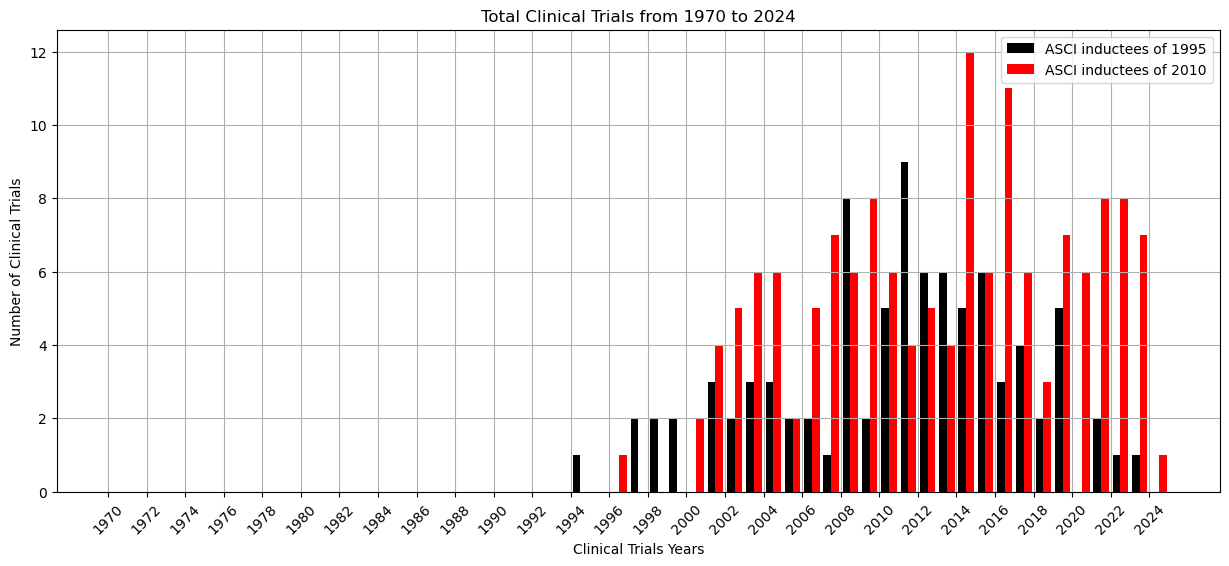

In [30]:
create_basic(clinical_trials, "year", "Clinical Trials")


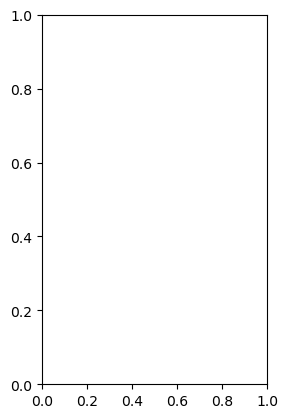

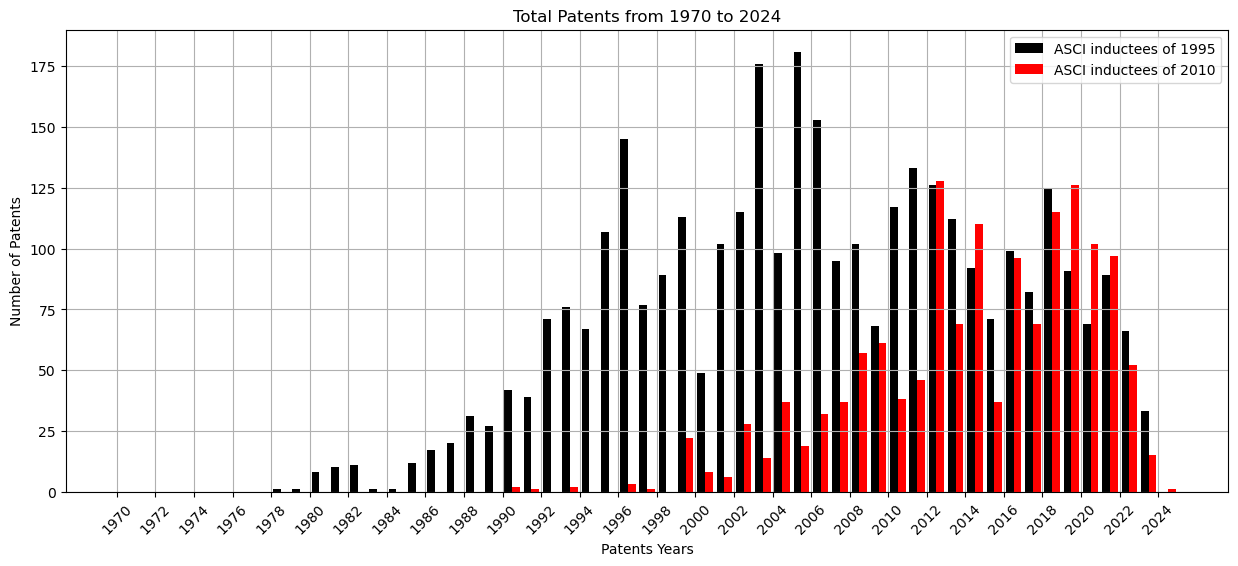

In [81]:
#plt.subplot(1, 2, 1)
create_basic(patents, "year", "Patents")


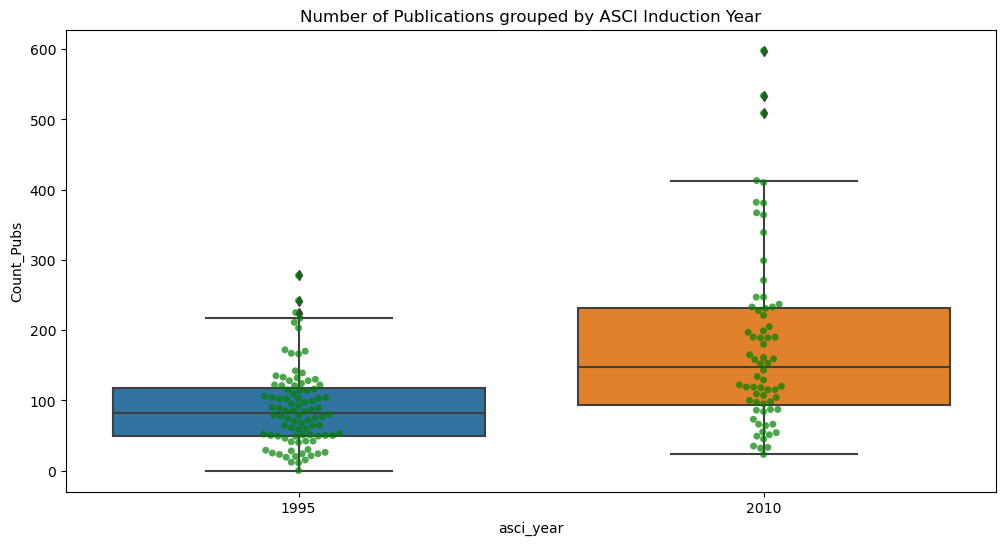

In [71]:
counts_var = get_df("Counts_Variables.csv")

numeric_columns = ['Count_Pubs', 'Count_CT', 'Count_Grants', 'Grant_Sums', 'Count_Patents', 'asci_year']
counts_var[numeric_columns] = counts_var[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 6))
sns.boxplot(x='asci_year', y='Count_Pubs', data=counts_var)
sns.swarmplot(x='asci_year', y='Count_Pubs', data=counts_var, color='green', alpha=0.7)
plt.title('Number of Publications grouped by ASCI Induction Year')
plt.show()


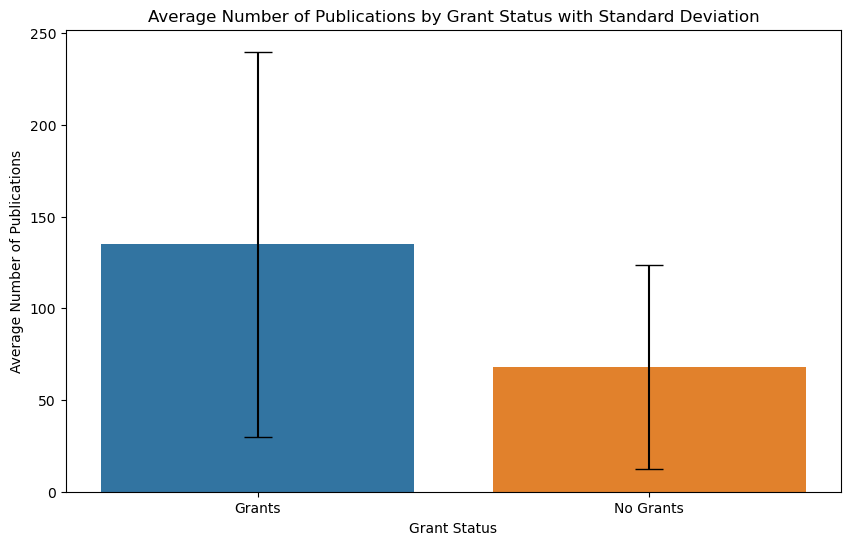

In [76]:
counts_var['Grant_Status'] = counts_var['Count_Grants'].apply(lambda x: 'No Grants' if x == 0 else 'Grants')

average_pubs = counts_var.groupby('Grant_Status')['Count_Pubs'].mean().reset_index()

grouped_data = counts_var.groupby('Grant_Status')['Count_Pubs'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Grant_Status', y='mean', data=grouped_data, ci='sd')  # 'ci' parameter specifies confidence interval
plt.errorbar(x=grouped_data['Grant_Status'], y=grouped_data['mean'], yerr=grouped_data['std'], fmt='none', color='black', capsize=10)
plt.title('Average Number of Publications by Grant Status with Standard Deviation')
plt.xlabel('Grant Status')
plt.ylabel('Average Number of Publications')
plt.show()

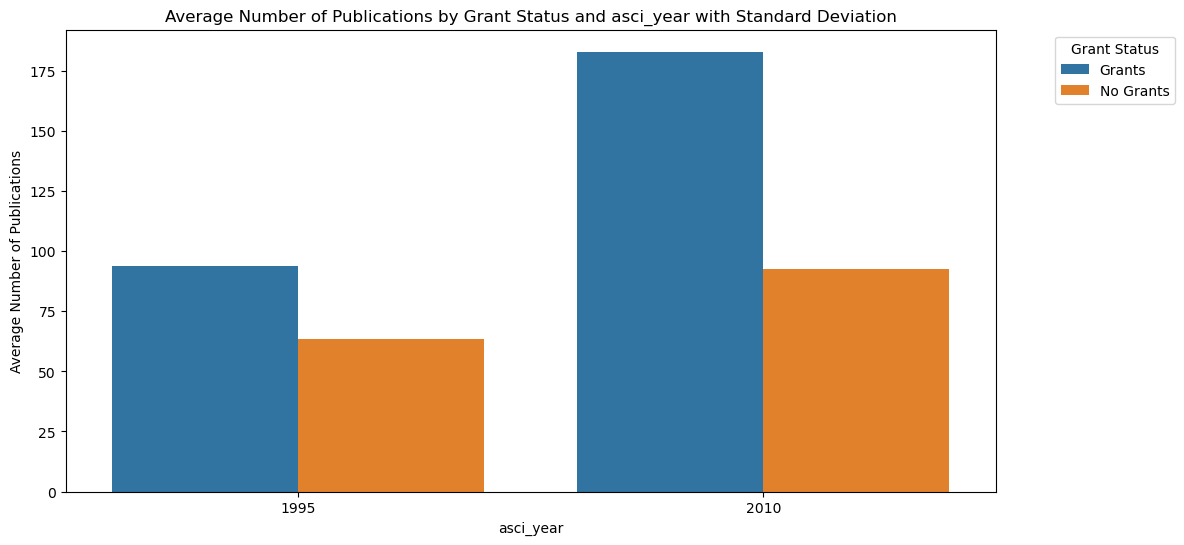

In [93]:
grouped_data = counts_var.groupby(['asci_year', 'Grant_Status'])['Count_Pubs'].agg(['mean', 'std']).reset_index()

# Create a bar chart with error bars representing standard deviation
plt.figure(figsize=(12, 6))
sns.barplot(x='asci_year', y='mean', hue='Grant_Status', data=grouped_data)

plt.title('Average Number of Publications by Grant Status and asci_year with Standard Deviation')
plt.xlabel('asci_year')
plt.ylabel('Average Number of Publications')
plt.legend(title='Grant Status', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()